**Convolutional Neural Networks (CNN)**



  



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [4]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/crop_yield.csv')
df.head()


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [5]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [6]:
print(df.columns)


Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')


In [7]:
scaler = StandardScaler()

df['Crop_Year_scaled'] = scaler.fit_transform(df[['Crop_Year']])
df['Area_scaled'] = scaler.fit_transform(df[['Area']])
df['Production_scaled'] = scaler.fit_transform(df[['Production']])
df['Annual_Rainfall_scaled'] = scaler.fit_transform(df[['Annual_Rainfall']])
df['Fertilizer_scaled'] = scaler.fit_transform(df[['Fertilizer']])
df['Pesticide_scaled'] = scaler.fit_transform(df[['Pesticide']])
df['Yield_scaled'] = scaler.fit_transform(df[['Yield']])


In [8]:
print(df.isnull().sum())


Crop                      0
Crop_Year                 0
Season                    0
State                     0
Area                      0
Production                0
Annual_Rainfall           0
Fertilizer                0
Pesticide                 0
Yield                     0
Crop_Year_scaled          0
Area_scaled               0
Production_scaled         0
Annual_Rainfall_scaled    0
Fertilizer_scaled         0
Pesticide_scaled          0
Yield_scaled              0
dtype: int64


In [9]:
df.nunique()

,0
Crop,55
Crop_Year,24
Season,6
State,30
Area,13644
Production,14016
Annual_Rainfall,634
Fertilizer,18598
Pesticide,17405
Yield,13551


In [10]:
label_encoder = LabelEncoder()
df['crop_encoded'] = label_encoder.fit_transform(df['Crop'])
df['season_encoded'] = label_encoder.fit_transform(df['Season'])
df['state_encoded'] = label_encoder.fit_transform(df['State'])

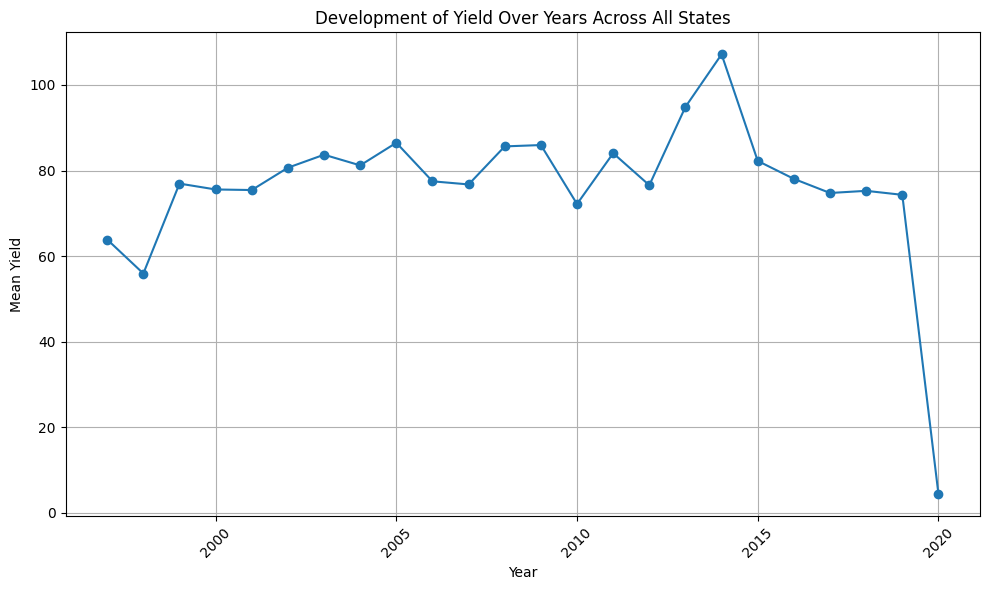

In [11]:
yearly_yield = df.groupby('Crop_Year')['Yield'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_yield['Crop_Year'], yearly_yield['Yield'], marker='o', linestyle='-')
plt.title('Development of Yield Over Years Across All States')
plt.xlabel('Year')
plt.ylabel('Mean Yield')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


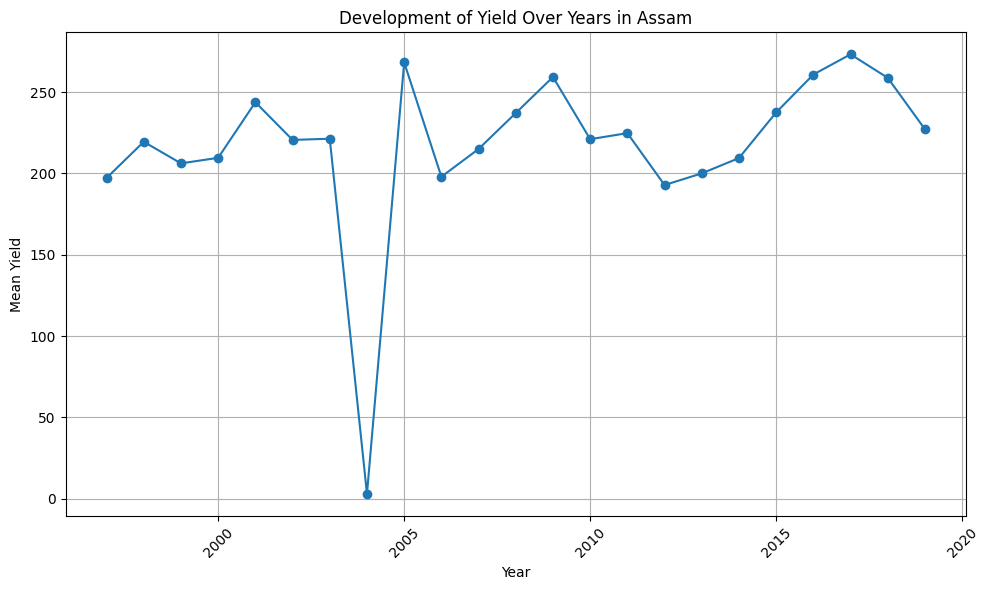

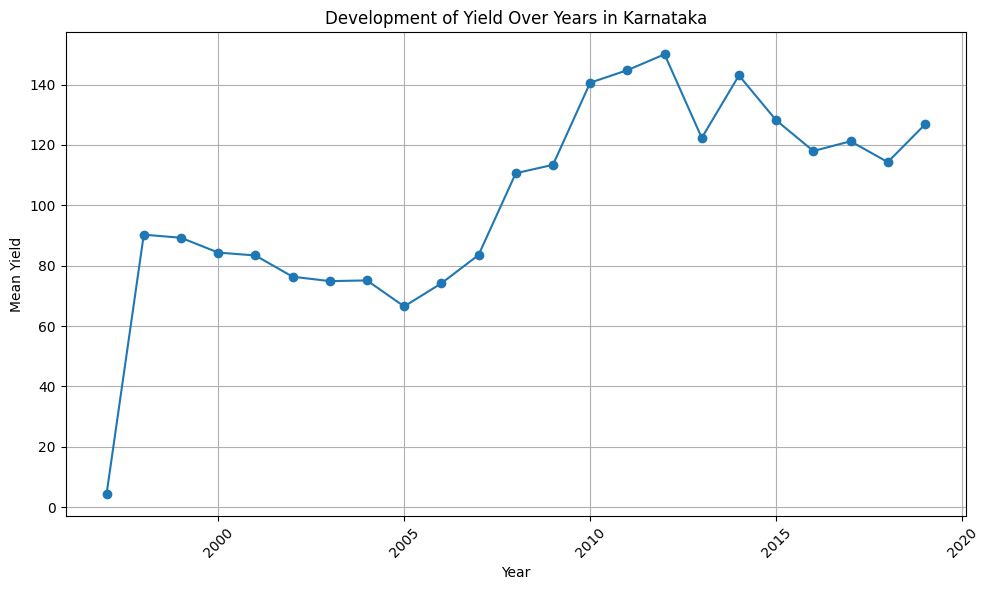

In [12]:
states = df['State'].unique()

i = 0
for state in states:
    state_data = df[df['State'] == state]
    yearly_yield = state_data.groupby('Crop_Year')['Yield'].mean().reset_index()

    i += 1
    if i > 2:
        break

    plt.figure(figsize=(10, 6))
    plt.plot(yearly_yield['Crop_Year'], yearly_yield['Yield'], marker='o', linestyle='-')
    plt.title(f'Development of Yield Over Years in {state}')
    plt.xlabel('Year')
    plt.ylabel('Mean Yield')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [13]:
features = ['Crop_Year_scaled', 'crop_encoded', 'state_encoded', 'Area_scaled',
            'Production_scaled', 'Annual_Rainfall_scaled', 'Fertilizer_scaled']
target = ['Yield_scaled']

X = df.loc[:, features]
Y = df.loc[:, target]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=20)


In [15]:
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
Y_train_cnn = Y_train.values


In [16]:
model = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_cnn.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.4),

    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.4),

    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(units=128, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(units=1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_absolute_error')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 7, 128)              │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 7, 64)               │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 7, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 32)               │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          28,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,153 (238.88 KB)

 Trainable params: 60,705 (237.13 KB)

 Non-trainable params: 448 (1.75 KB)

In [18]:
early_stopping = EarlyStopping(patience=15, restore_best_weights=True)


In [19]:
history = model.fit(X_train_cnn, Y_train_cnn, epochs=300, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)


Epoch 1/300
296/296 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 2.5551 - val_loss: 1.6036
Epoch 2/300
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.9759 - val_loss: 1.4181
Epoch 3/300
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.6292 - val_loss: 1.2462
Epoch 4/300
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.3583 - val_loss: 1.0998
Epoch 5/300
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.1497 - val_loss: 0.9642
Epoch 6/300
296/296 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.9676 - val_loss: 0.8345
Epoch 7/300
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.8300 - val_loss: 0.7170
Epoch 8/300
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.7155 - val_loss: 0.6119
Epoch 9/300
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.6014 - val_loss: 0.5145
Epoch 10/300
296/296 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.4990 - val_loss: 0.4296
Epoch 11/300
296/296 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.4227 - val_loss: 0.3559
Epoch 12/300
296/296 ━━━━━━━━━━━━━━━

In [20]:
Y_pred = model.predict(X_test_cnn)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("R-squared (R2):", r2)
print("Mean Squared Error:", mse)


247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Mean Absolute Error: 0.0255741785485457
R-squared (R2): 0.8270401358604431
Mean Squared Error: 0.17678617969593613


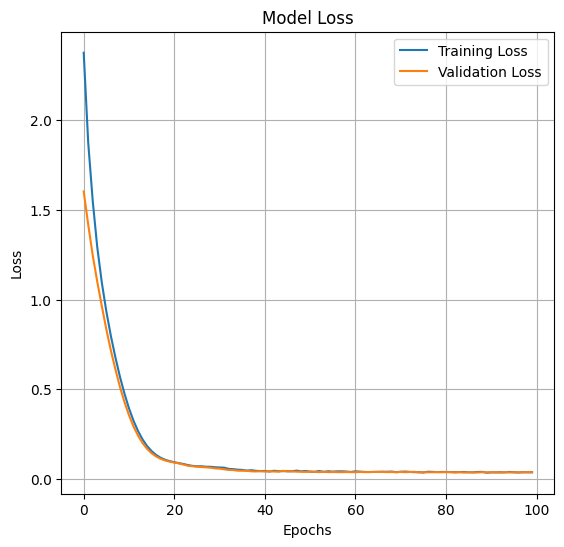

In [21]:
plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)



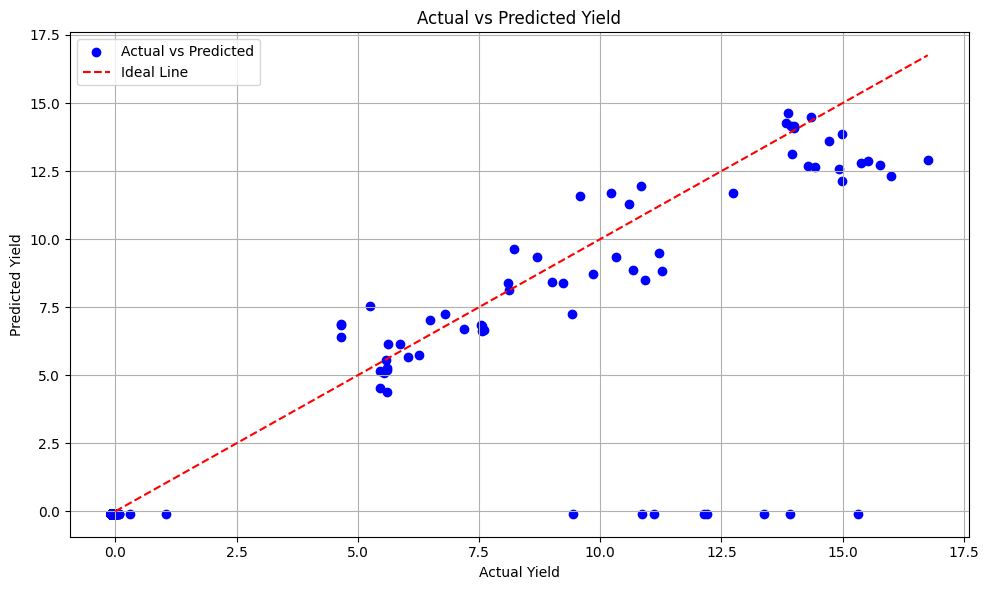

In [23]:
# Visualization: Actual vs Predicted Yield
plt.figure(figsize=(10, 6))
plt.scatter(Y_test.values, Y_pred, color='blue', label='Actual vs Predicted')
max_val = np.max([np.max(Y_test), np.max(Y_pred)])
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Ideal Line')

plt.title('Actual vs Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()